# NBFC Loan Default

## Context:

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.
The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regard to their contribution to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted.
The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on a loan payment or not.

## Objective:

The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


## Data Description

* ID - unique ID assigned to each applicant
* loan_amnt - loan amount ($) applied each applicant
* loan_term - Loan duration in years
* interest_rate - Applicable interest rate on Loan in %
* loan_grade - Loan Grade Assigned by the bank
* loan_subgrade - Loan SubGrade Assigned by the bank
* job_experience - Number of years job experience
* home_ownership - Status of House Ownership
* annual_income - Annual income of the applicant
* income_verification_status -Status of Income verification by the bank
* loan_purpose - Purpose of loan
* state_code - State code of the applicant's residence
* debt_to_income- Ratio to total debt to income (total debt might include other loan aswell)
* delinq_2yrs - number of 30+ days delinquency in past 2 years
* public_records - number of legal cases against the applicant
* revolving_balance - total credit revolving balance
* total_acc - total number of credit lines available in members credit line
* interest_receive - total interest received by the bank on the loan
* application_type - Whether the applicant has applied the loan by creating individuall or joint account
* last_week_pay - How many months have the applicant paid the loan EMI already
* total_current_balance - total current balance of all the accounts of applicant
* total_revolving_limit - total revolving credit limit
* default - "status of loan amount, 1 = Defaulter, 0 = Non Defaulters"


## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

In [2]:
!pip install category_encoders

In [3]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# to set a graph theme in seaborn
sns.set_theme(style="darkgrid",  palette="husl")

# To impute missing values
from sklearn.impute import SimpleImputer

# To use Category encoding methods
import category_encoders as ce

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#import lightgbm as lgb
from lightgbm import LGBMClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# read the data
loan = pd.read_csv('/content/drive/MyDrive/Learning/PGPDSBA/Hackathon-2/Train_set.csv')

#Make a copy of the dataset
df = loan.copy()

In [19]:
#load the test data_set
df_test = pd.read_csv('/content/drive/MyDrive/Learning/PGPDSBA/Hackathon-2/Test_set.csv')

## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

In [ ]:
df.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


### Displaying the last few rows of the dataset

In [ ]:
df.tail()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93169,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.0,Not Verified,debt_consolidation,FL,17.11,0.0,0.0,7924,38.0,55.34,INDIVIDUAL,13.0,64635.0,47600.0,0
93170,836021,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.0,Not Verified,other,FL,22.64,0.0,0.0,10174,24.0,299.67,INDIVIDUAL,161.0,NaN,NaN,1
93171,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.5,Source Verified,credit_card,AK,13.04,1.0,0.0,5391,25.0,1150.58,INDIVIDUAL,65.0,94596.0,6500.0,0
93172,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.0,Verified,debt_consolidation,CA,17.22,0.0,0.0,24609,45.0,5764.58,INDIVIDUAL,56.0,33759.0,34900.0,1
93173,3628127,10000,3 years,15.80,C,C3,<5 Years,RENT,60000.0,Verified,debt_consolidation,NJ,11.83,0.0,0.0,11285,7.0,2279.36,INDIVIDUAL,104.0,25594.0,12300.0,0


### Checking the shape of the dataset

In [ ]:
df.shape

(93174, 23)

* The dataset contains information (23 attributes) about 93174 Loan Applications

### Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

* There are 14 numeric (*float* and *int* type) and 9 string (*object* type) columns in the data
* The target variable is the default, which is of *integer* type

### Statistical summary of the dataset

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,93174.0,NaN,NaN,NaN,35050211.389476,24149262.073938,70735.0,10859832.5,37107507.0,58598949.5,73519746.0
loan_amnt,93174.0,NaN,NaN,NaN,14733.861378,8428.184858,500.0,8000.0,13000.0,20000.0,35000.0
loan_term,93174,2,3 years,65211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interest_rate,93174.0,NaN,NaN,NaN,13.233433,4.368728,5.32,9.99,12.99,16.2,28.99
loan_grade,93174,7,B,26865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_subgrade,93174,35,B4,5879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_experience,88472,3,<5 Years,40610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,93174,5,MORTGAGE,46445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,93173.0,NaN,NaN,NaN,75028.258559,69454.783994,1200.0,45000.0,64000.0,90000.0,9500000.0
income_verification_status,93174,3,Source Verified,34487,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for duplicate values

In [ ]:
df.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data

### Checking for missing values

In [ ]:
df.isnull().sum()

,0
ID,0
loan_amnt,0
loan_term,0
interest_rate,0
loan_grade,0
loan_subgrade,0
job_experience,4702
home_ownership,0
annual_income,1
income_verification_status,0


* There are significant missing values in some columns; shoudl be treated during the Data preparation steps

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

####Lets convert the columns with an 'object' datatype into categorical variables

In [20]:
# convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

* ID column is unique and not a relevant column for the model building. Lets drop it!!

In [21]:
# drop the column *case_id* from the dataframe
df.drop(["ID"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          93174 non-null  int64   
 1   loan_amnt                   93174 non-null  int64   
 2   loan_term                   93174 non-null  category
 3   interest_rate               93174 non-null  float64 
 4   loan_grade                  93174 non-null  category
 5   loan_subgrade               93174 non-null  category
 6   job_experience              88472 non-null  category
 7   home_ownership              93174 non-null  category
 8   annual_income               93173 non-null  float64 
 9   income_verification_status  93174 non-null  category
 10  loan_purpose                93174 non-null  category
 11  state_code                  93174 non-null  category
 12  debt_to_income              93174 non-null  float64 
 13  delinq_2yrs     

#### Let's check the count of each unique category in each of the categorical variables

In [22]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("category").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

loan_term
3 years    65211
5 years    27963
Name: count, dtype: int64
--------------------------------------------------
loan_grade
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: count, dtype: int64
--------------------------------------------------
loan_subgrade
B4    5879
B3    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: count, dtype: int64
--------------------------------------------------
job_experience
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: count, dtype: int64
--------------------------------------------------
home_ownership
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

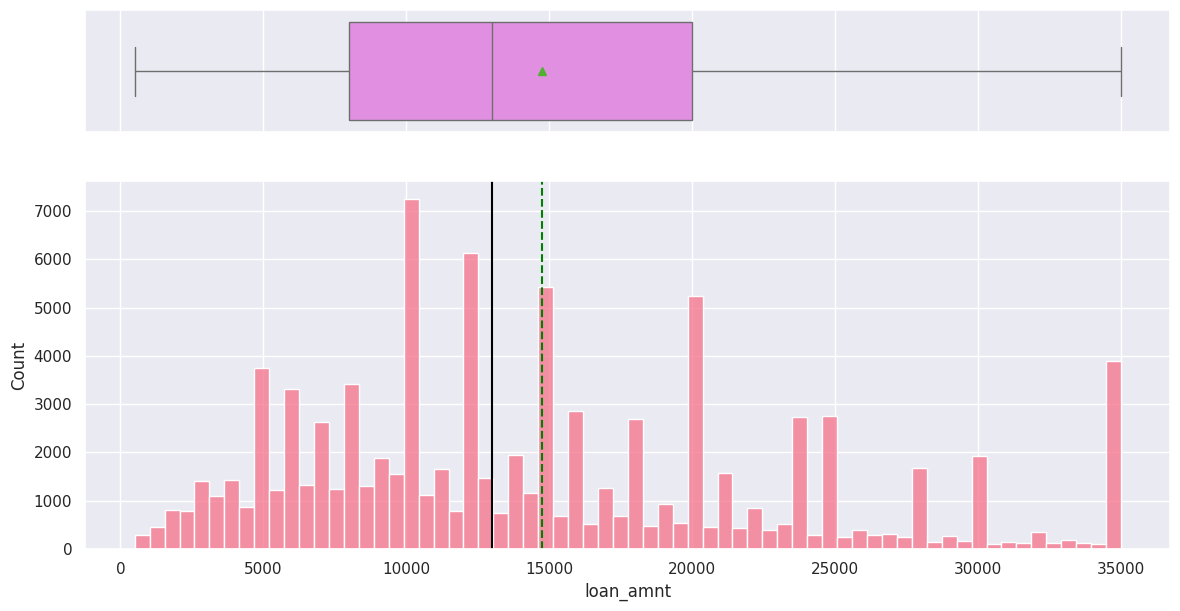

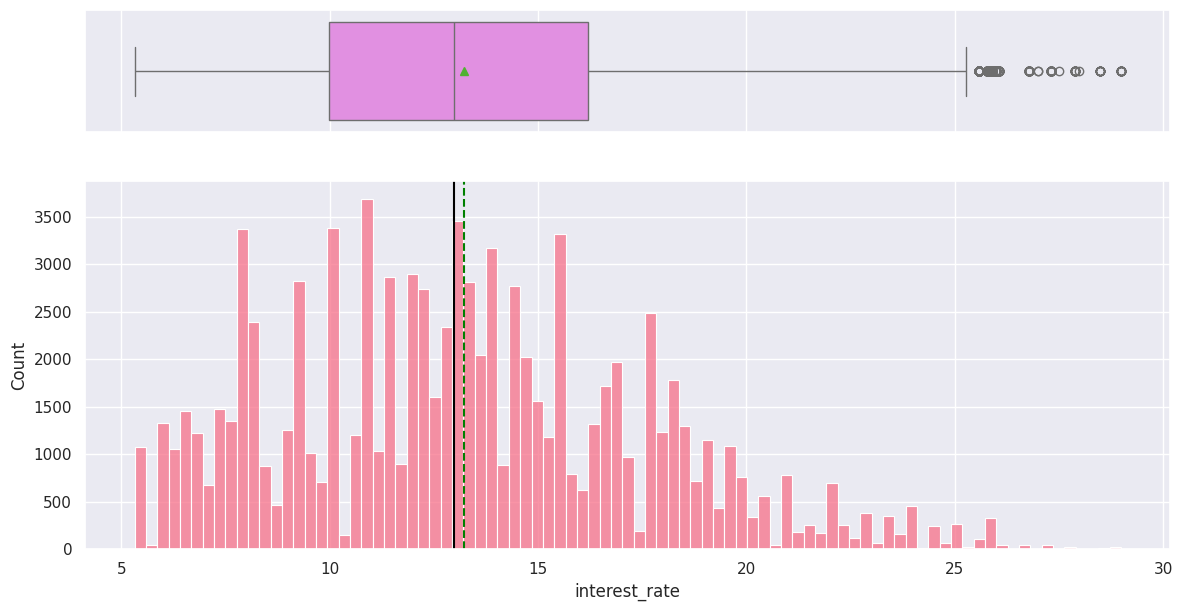

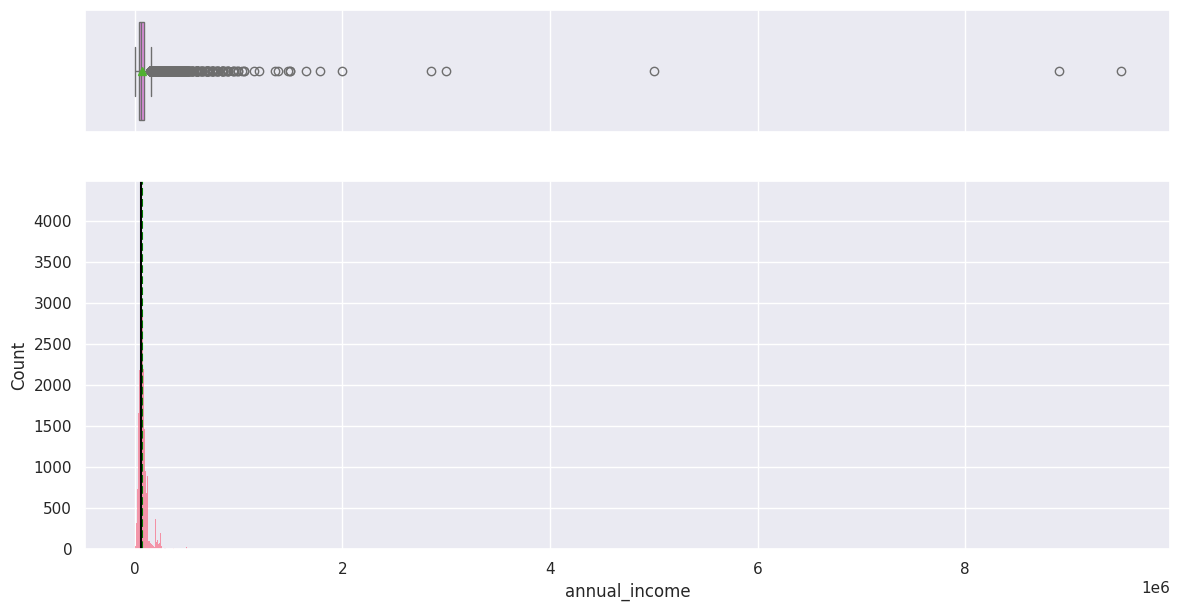

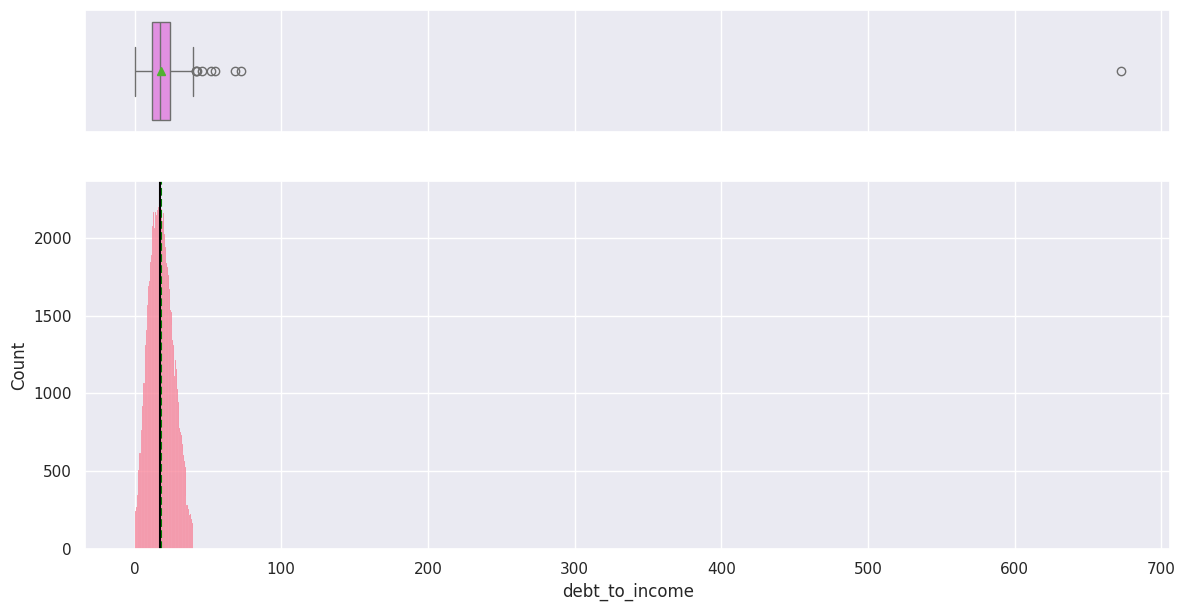

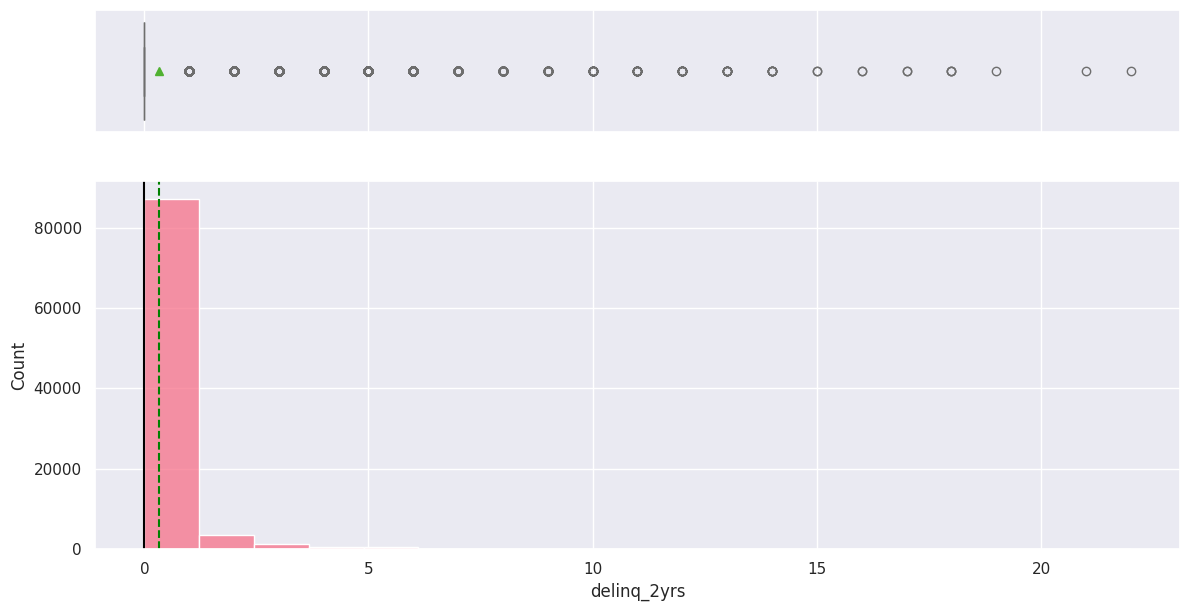

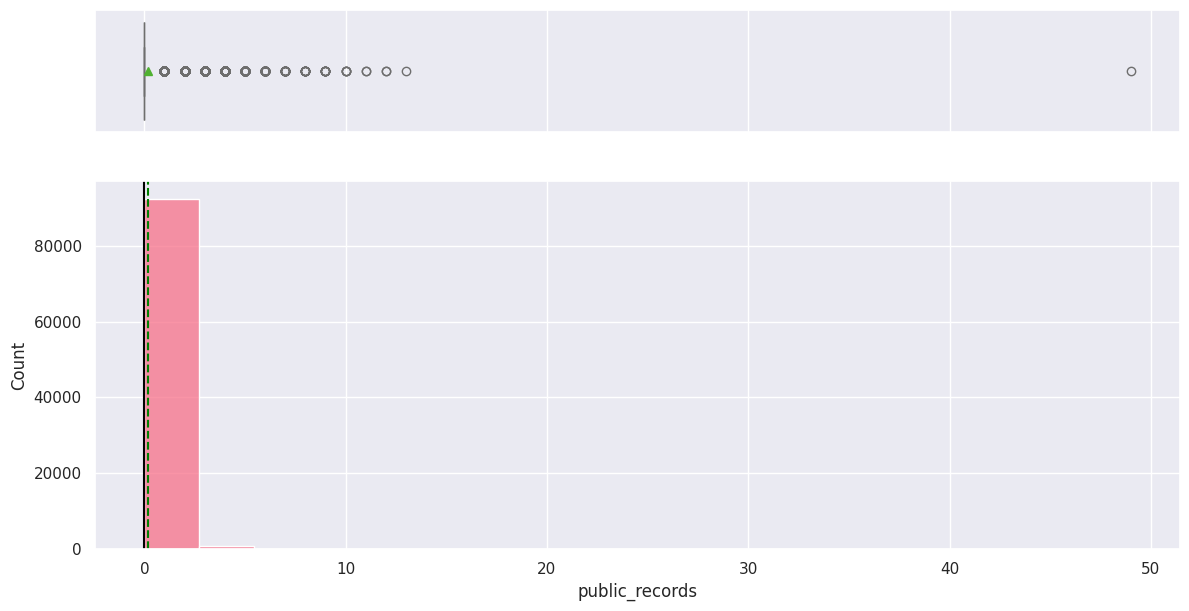

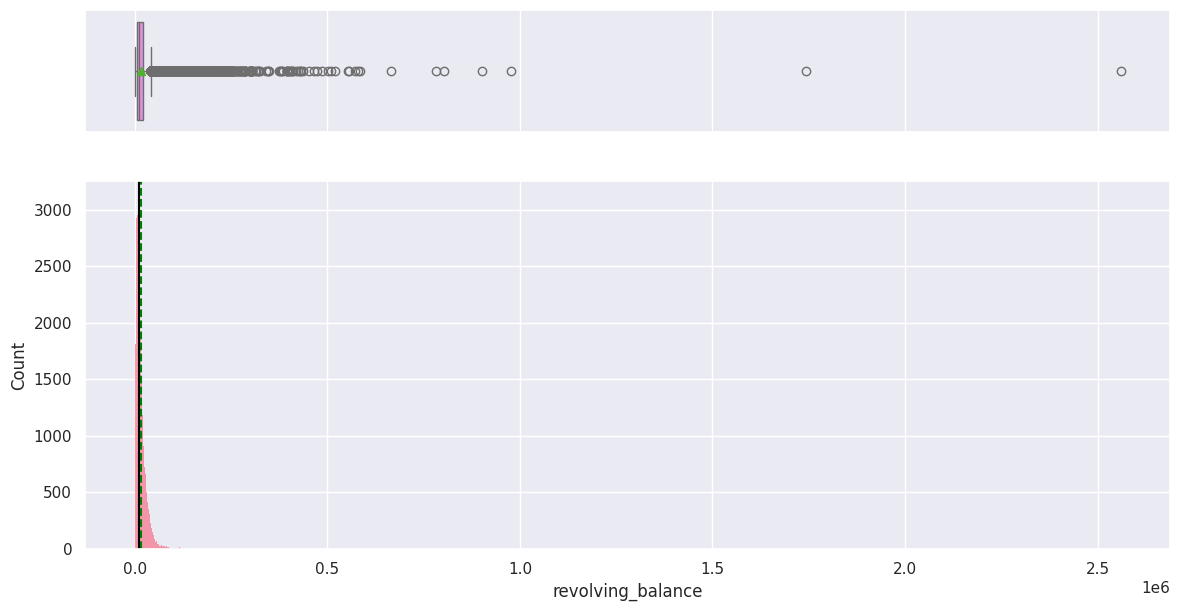

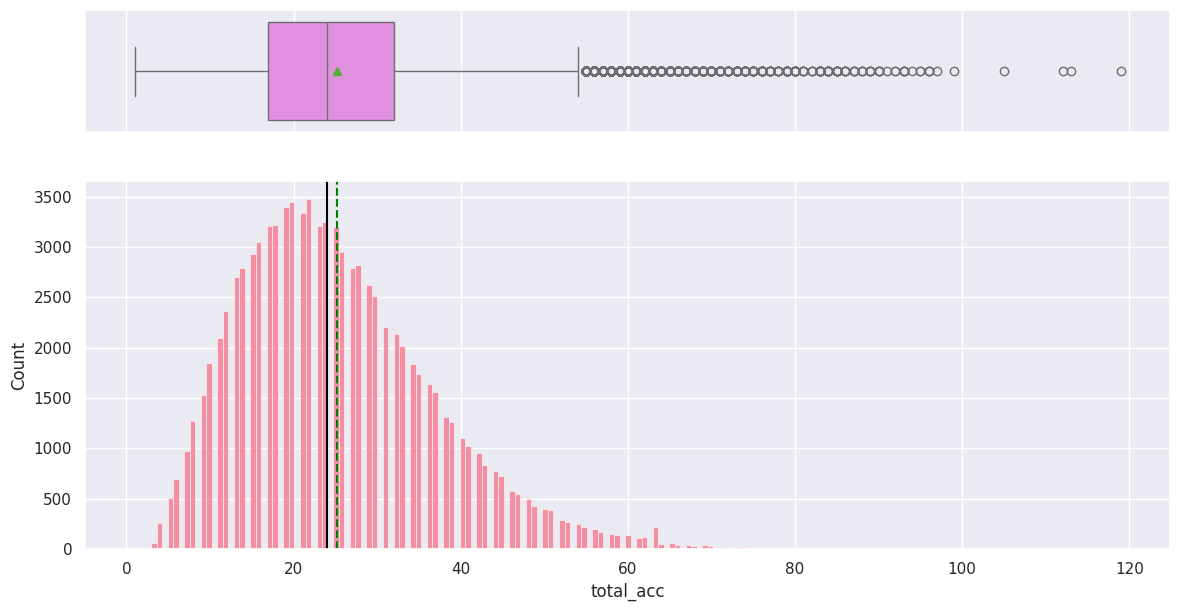

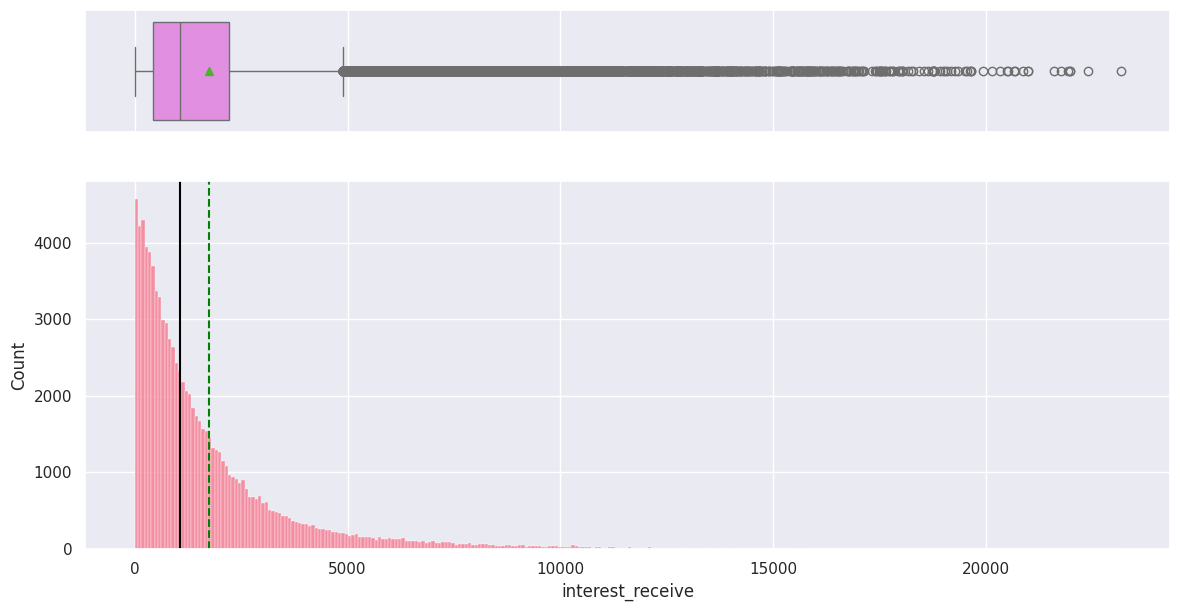

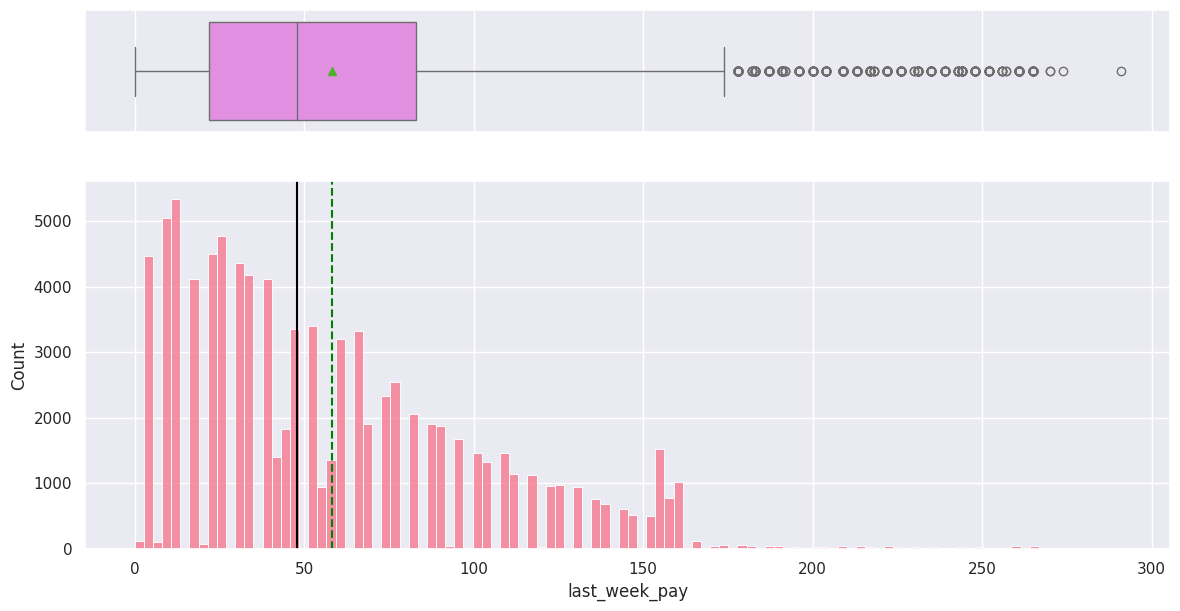

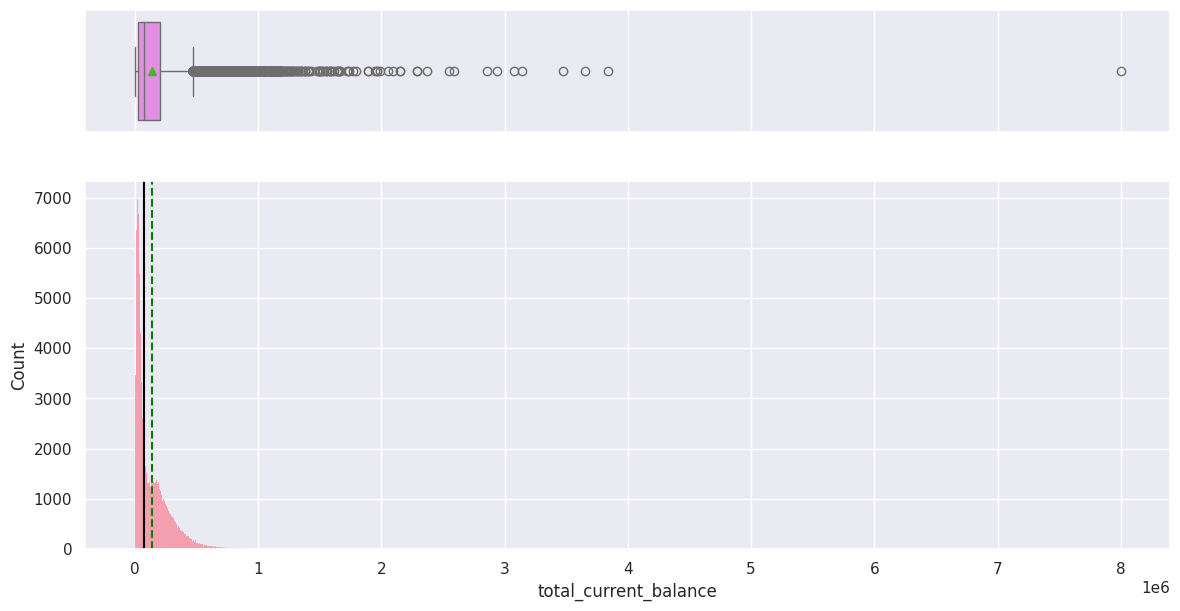

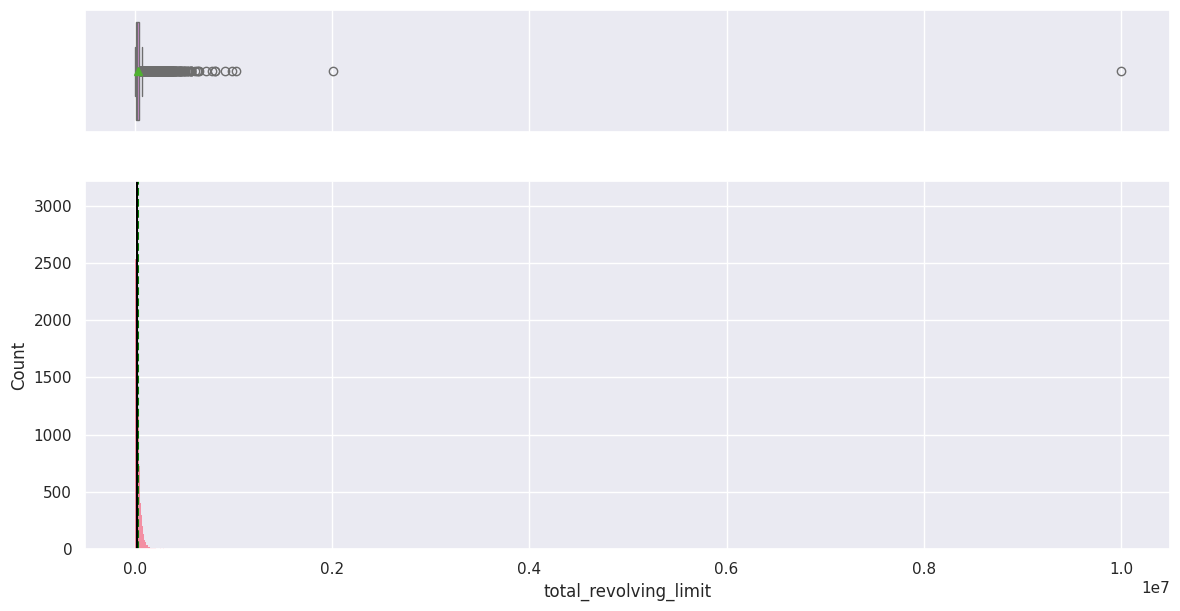

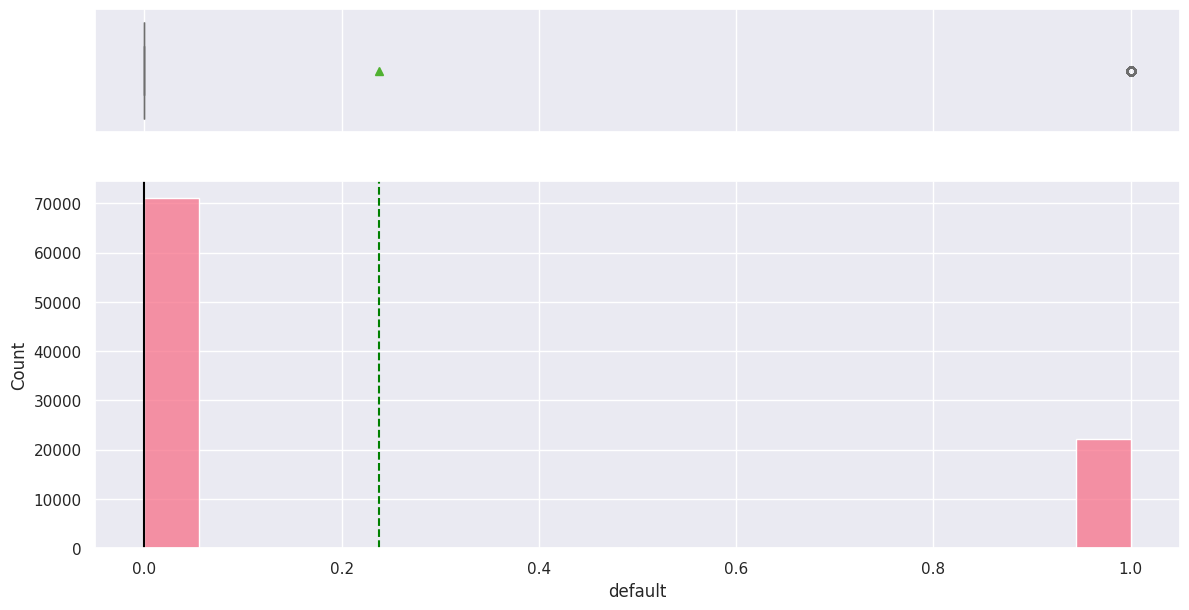

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for cols in num_cols:
    histogram_boxplot(df, cols,figsize=(14, 7))

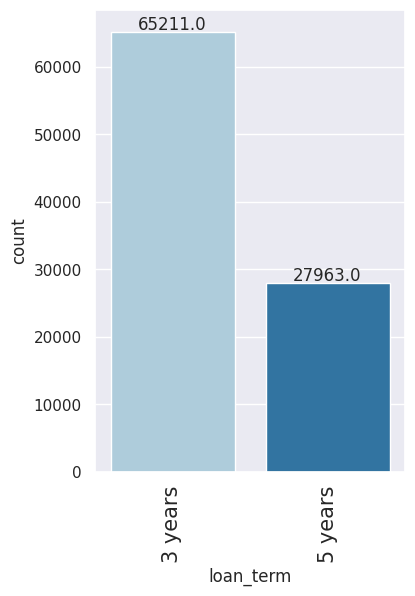

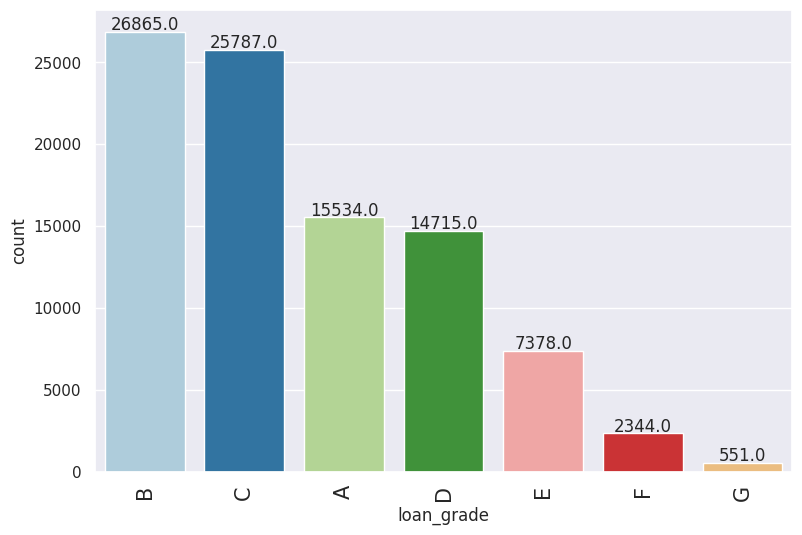

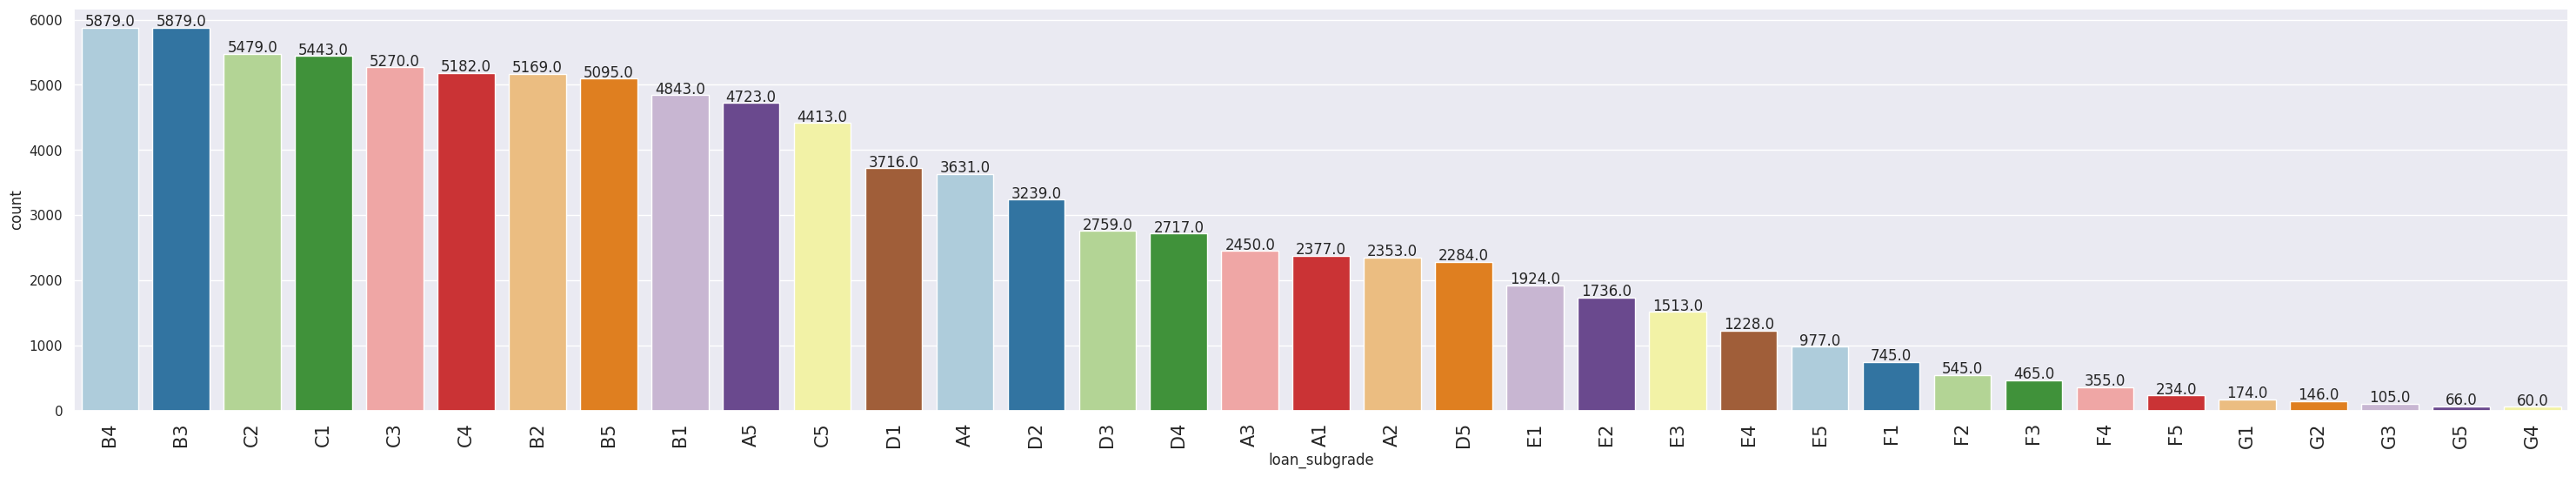

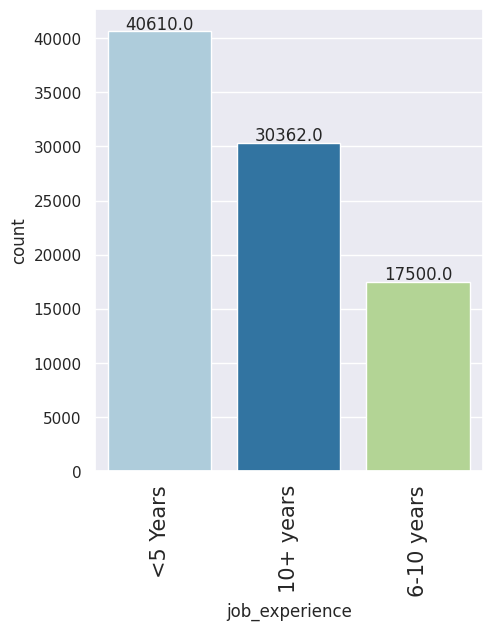

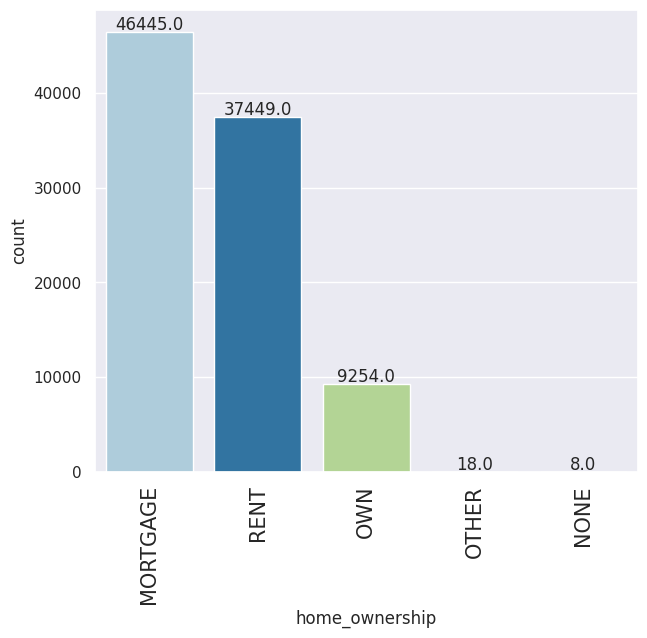

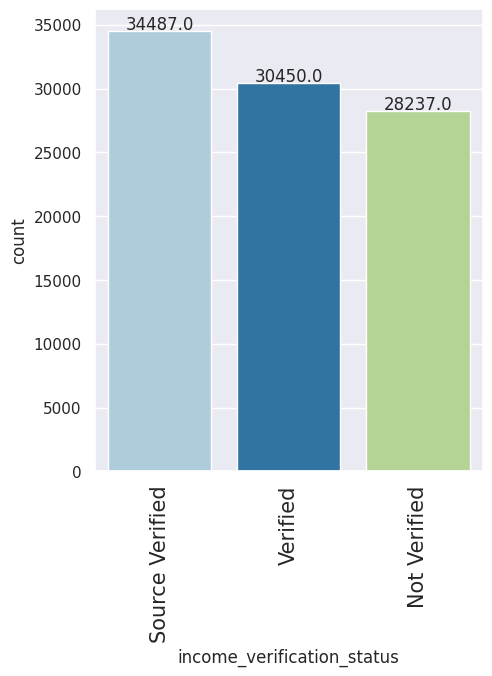

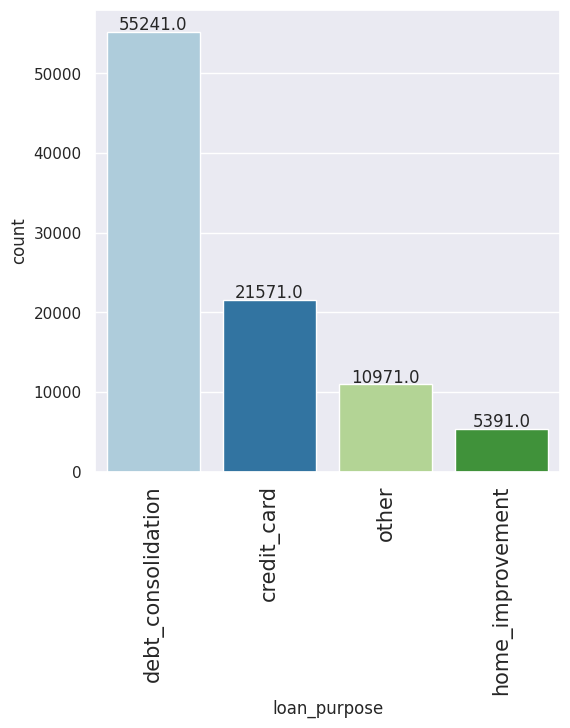

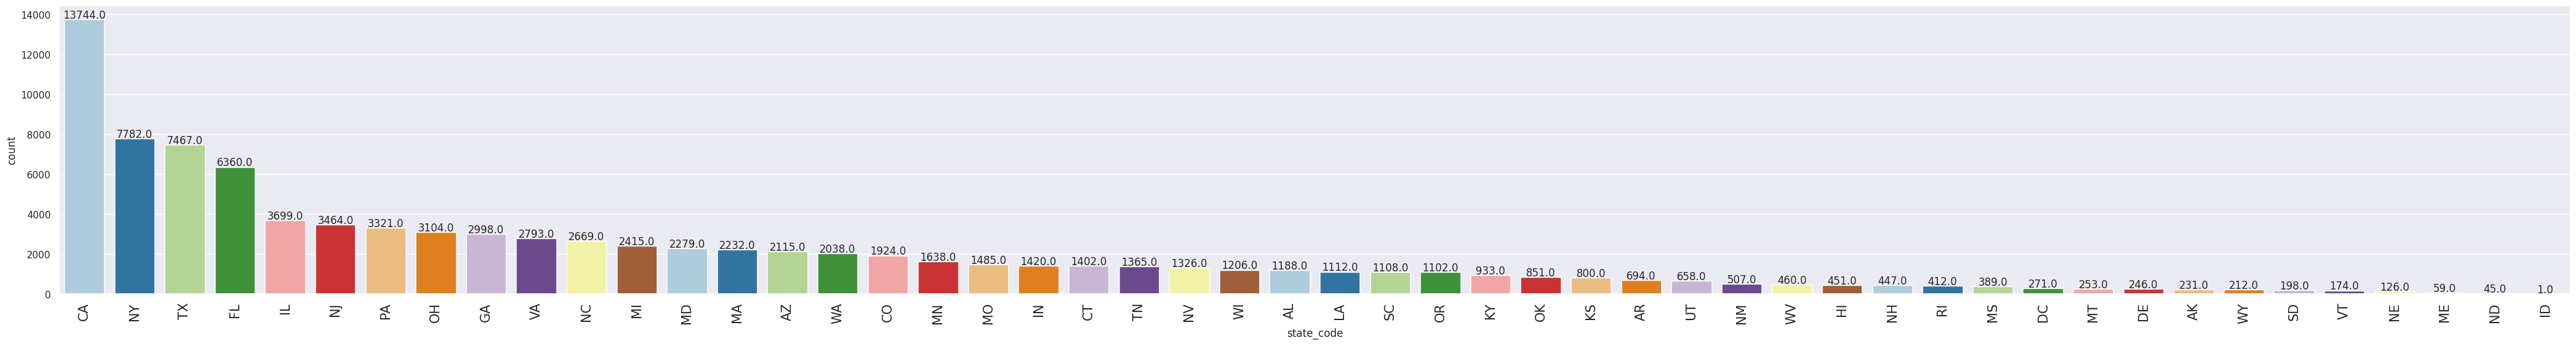

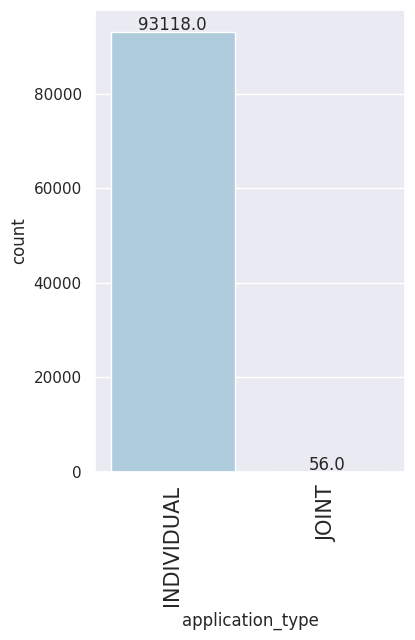

In [ ]:
cat_cols = df.select_dtypes(include='category').columns.tolist()
for cols in cat_cols:
    labeled_barplot(df, cols)

### Bivariate Analysis

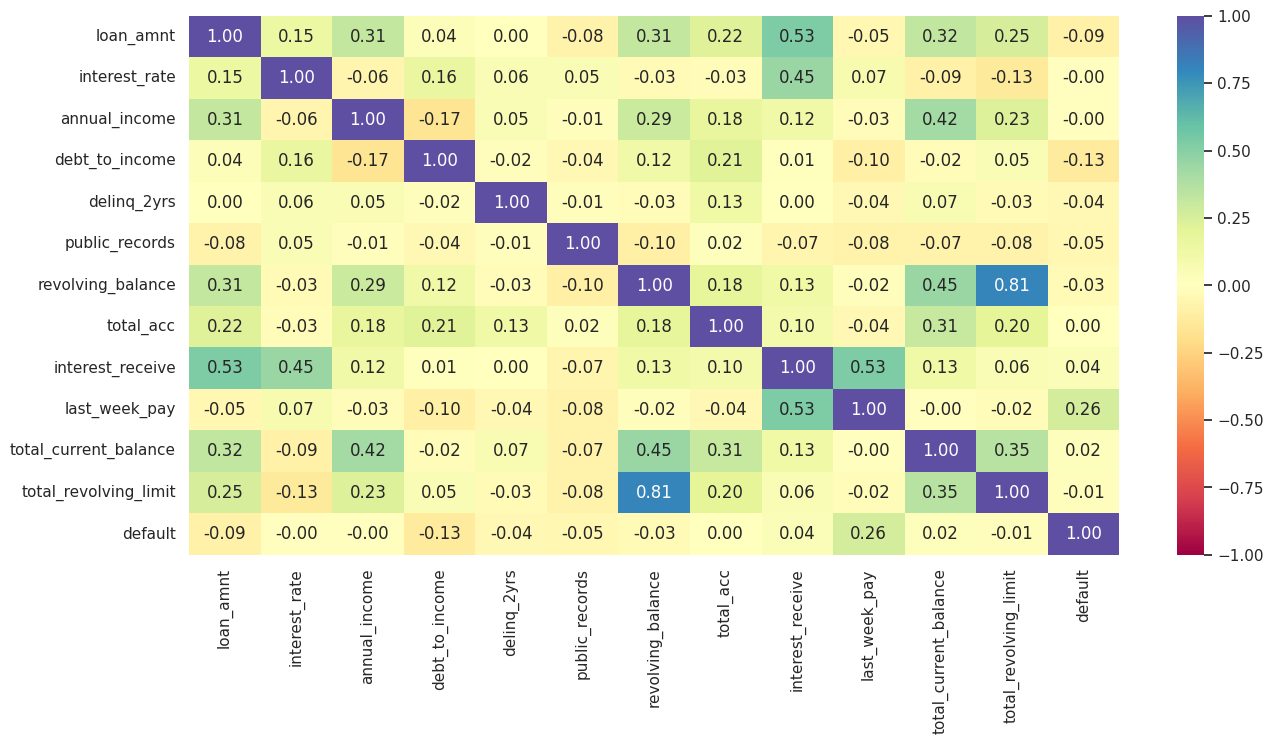

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Loan Term Vs Default

default        0      1    All
loan_term                     
All        71045  22129  93174
3 years    47345  17866  65211
5 years    23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


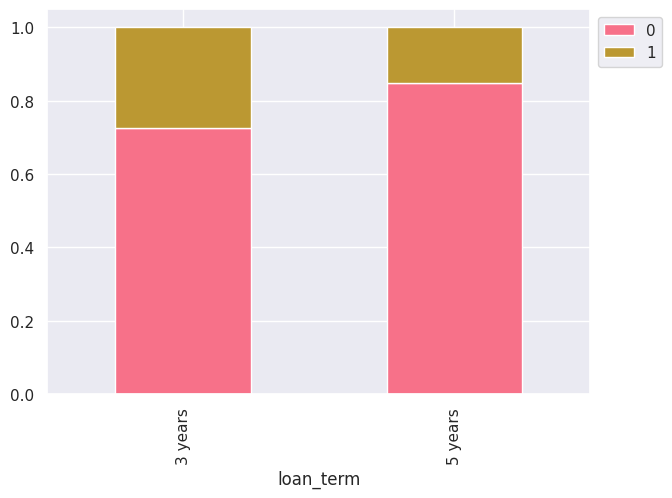

In [ ]:
stacked_barplot(df, "loan_term", "default")

#### job_experience Vs Default

default             0      1    All
job_experience                     
All             67140  21332  88472
<5 Years        30377  10233  40610
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
------------------------------------------------------------------------------------------------------------------------


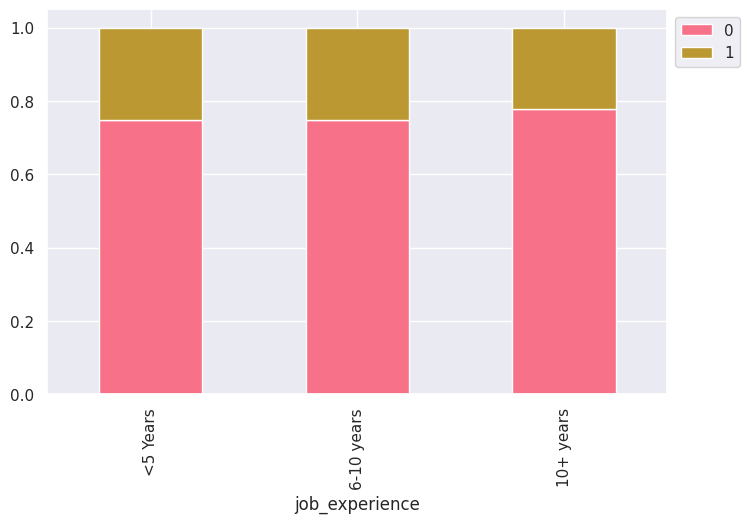

In [ ]:
stacked_barplot(df, "job_experience", "default")

#### home_ownership Vs Default

default             0      1    All
home_ownership                     
All             71045  22129  93174
MORTGAGE        35316  11129  46445
RENT            28401   9048  37449
OWN              7323   1931   9254
OTHER               3     15     18
NONE                2      6      8
------------------------------------------------------------------------------------------------------------------------


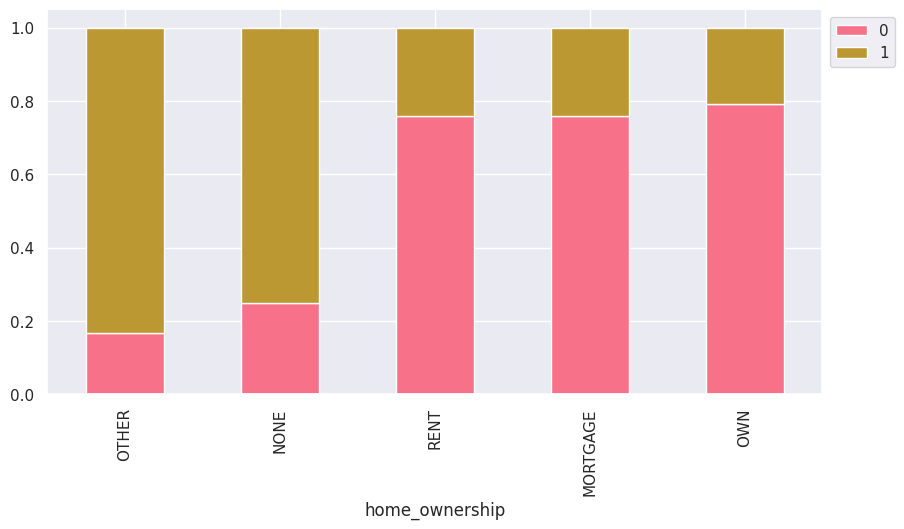

In [ ]:
stacked_barplot(df, "home_ownership", "default")

#### loan_purpose Vs Default

default                 0      1    All
loan_purpose                           
All                 71045  22129  93174
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3408  10971
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


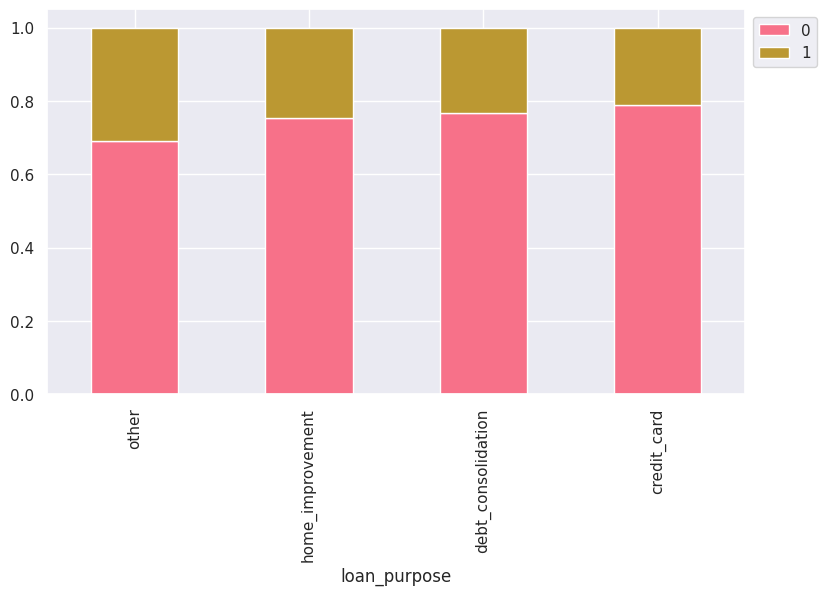

In [ ]:
stacked_barplot(df, "loan_purpose", "default")

#### application_type Vs Default

default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


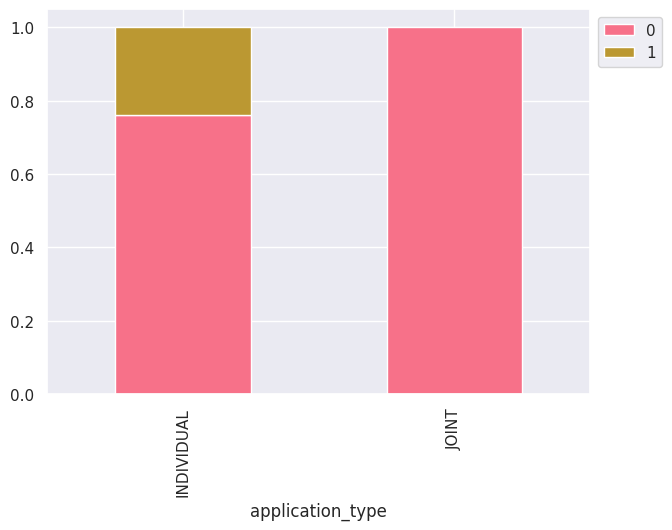

In [ ]:
stacked_barplot(df, "application_type", "default")

#### loan_amt Vs default

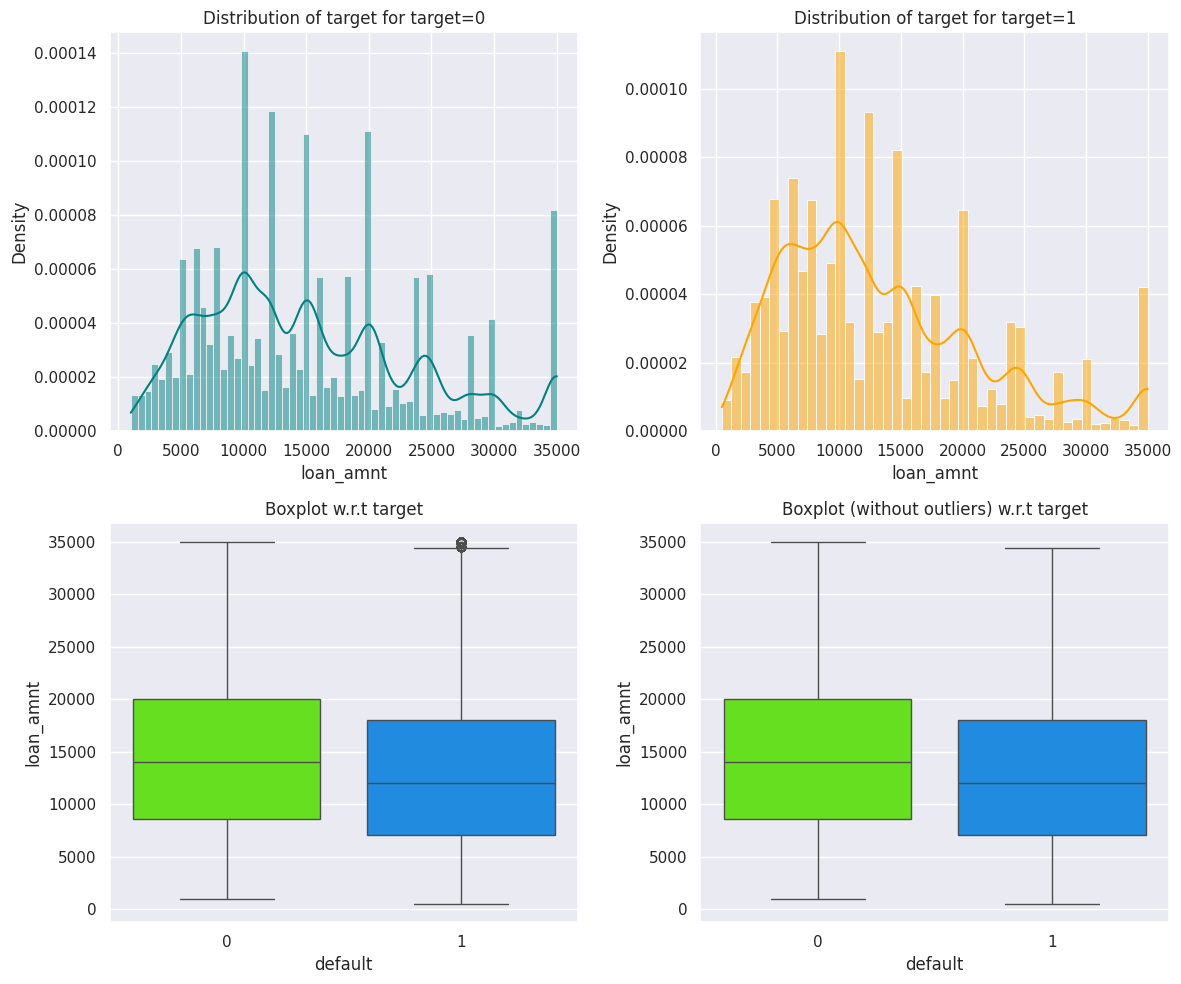

In [ ]:
#Plot distribution of prevailing wage and case status
distribution_plot_wrt_target(df, "loan_amnt", "default")

#### interest_rate Vs default

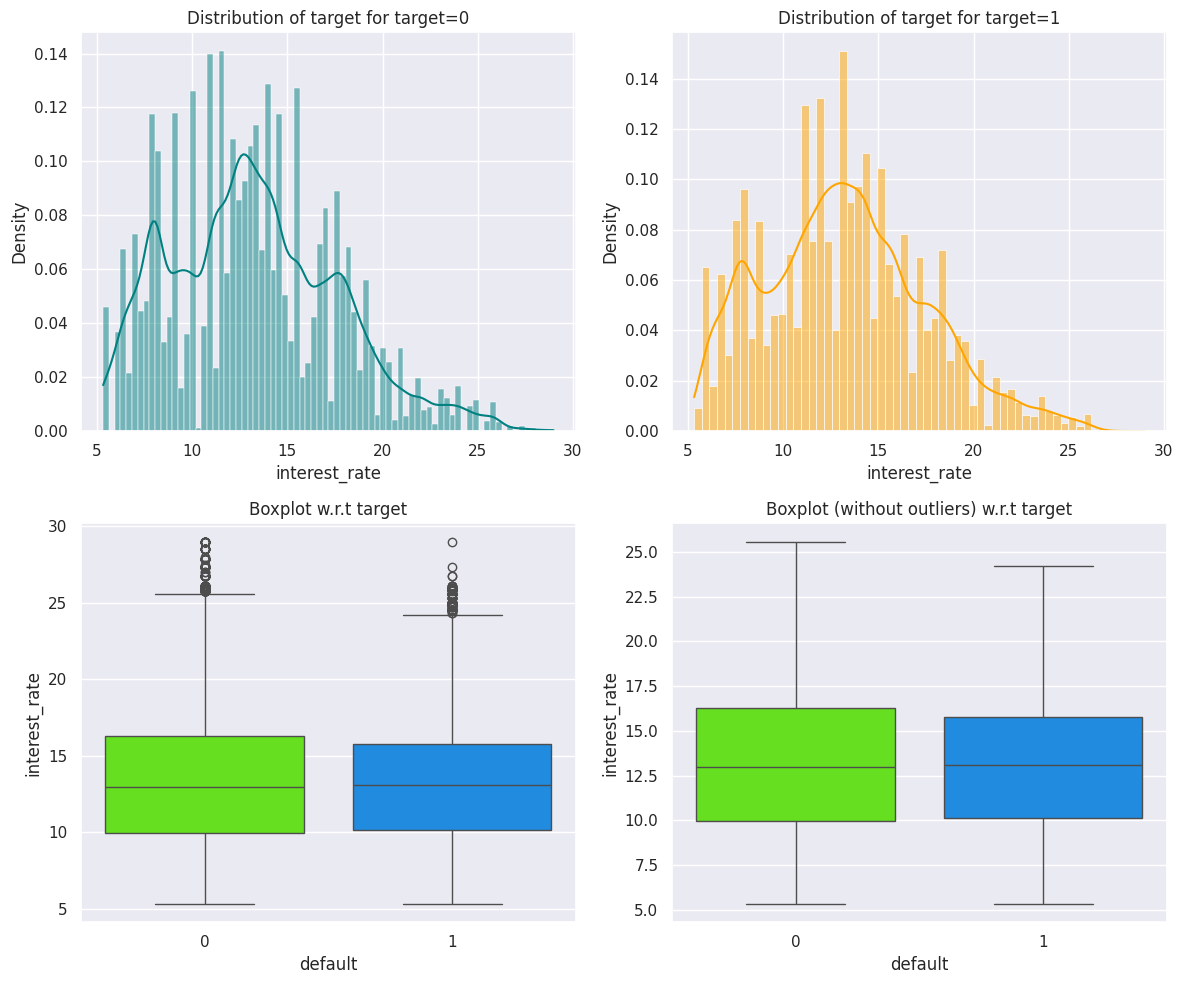

In [ ]:
#Plot distribution of prevailing wage and case status
distribution_plot_wrt_target(df, "interest_rate", "default")

#### annual_income Vs default

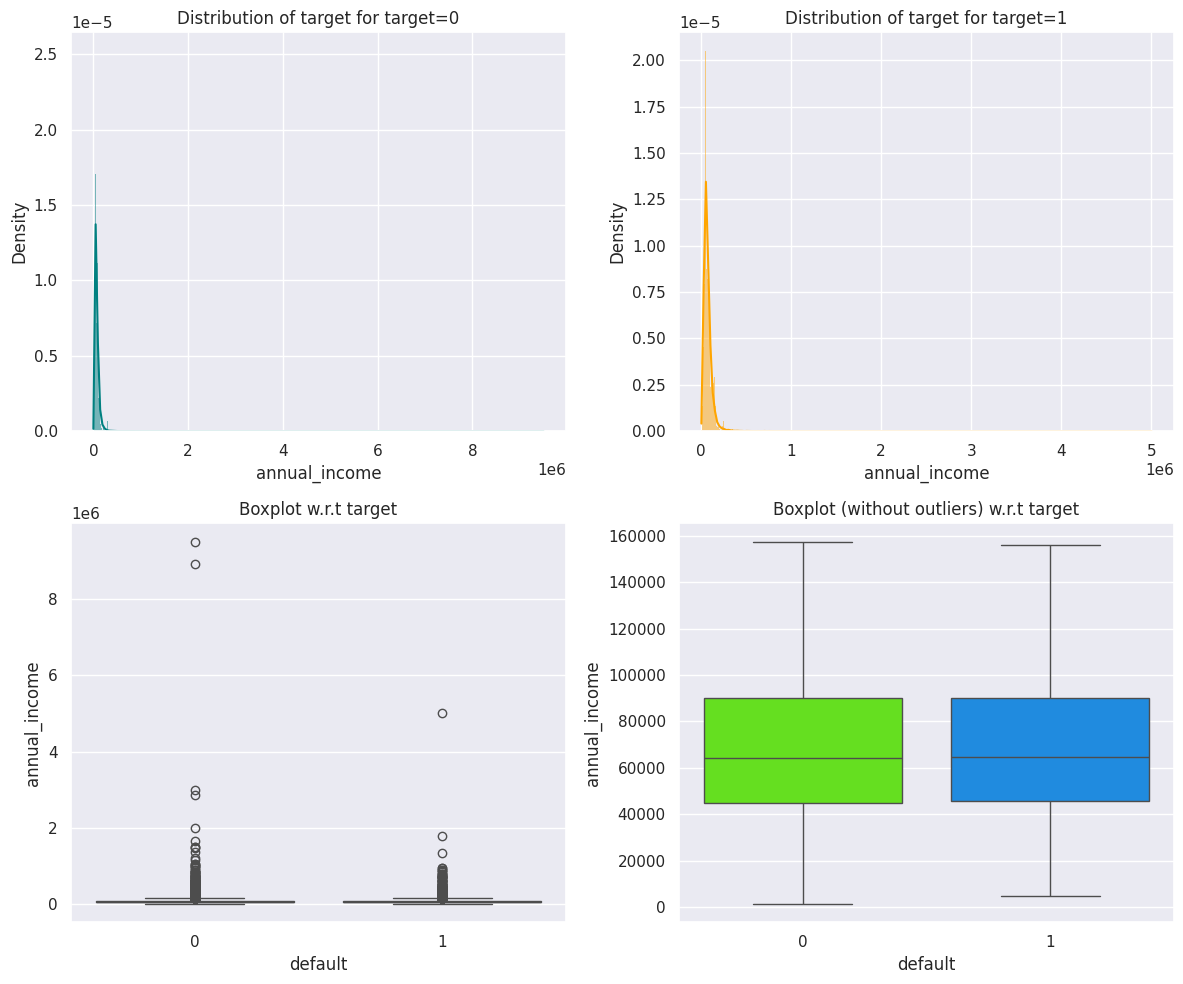

In [ ]:
#Plot distribution of prevailing wage and case status
distribution_plot_wrt_target(df, "annual_income", "default")

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's check for outliers in the data.

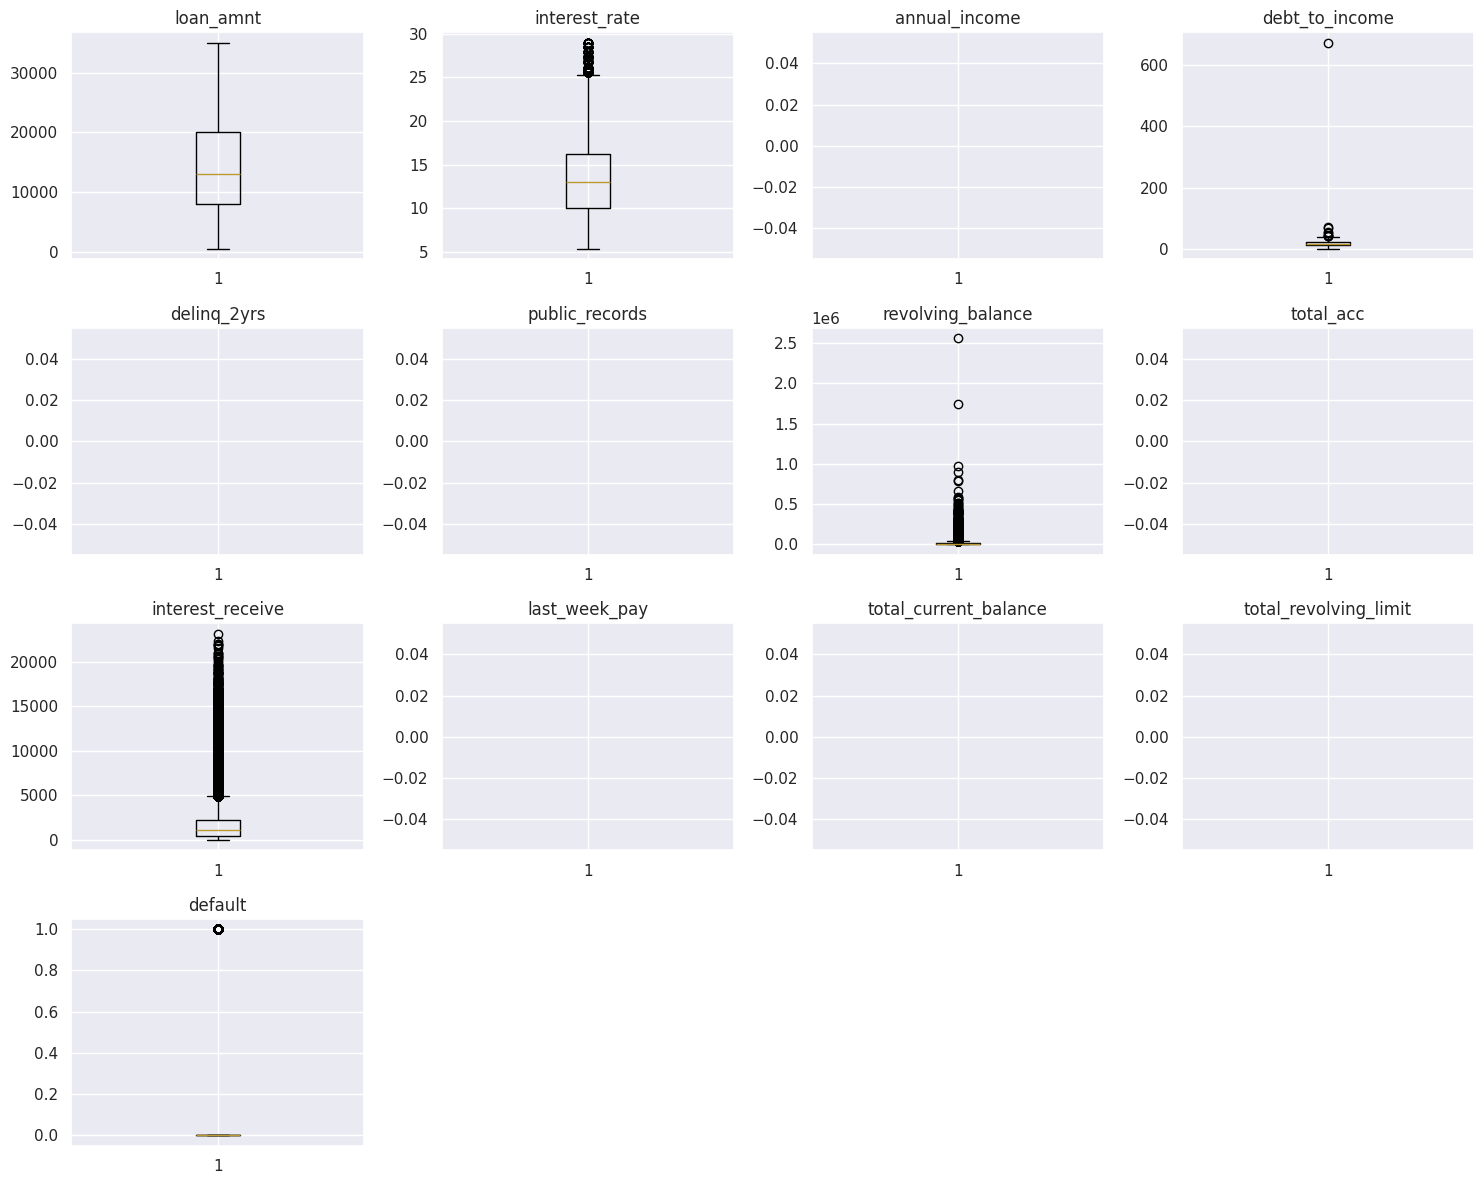

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All of these are part of the data and hence not treating them for outliers.

## EDA

- It is a good idea to explore the data once again after manipulating it.
- However, since nothing has been changed since the initial EDA, there is no point in redoing them; so lets proceed to the next steps

### Data Preparation for modeling

- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and validation to be able to evaluate the model that we build on the train data.

In [23]:
data=df.copy()
test_data=df_test.copy()

In [24]:
# Dividing train data into X and y
X = data.drop(["default"], axis=1)
y = data["default"]

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


*to avoid any data leakage, we will first split the dataset in the training file to train and validation.*

In [25]:
# Splitting train dataset into training and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y)

# Checking the number of rows and columns in the X_train data and X_val data
print(X_train.shape, X_val.shape)

(65221, 21) (27953, 21)


In [26]:
# Dropping the "ID" column from test dataset for now to keep to consistent with train/val data across the transformations
X_test = df_test.drop(["ID"], axis=1)
X_test_ID = df_test["ID"]

## Missing value imputation




* From the EDA, lets conclude the best imputation strategy for columns - ***'job_experience', 'delinq_2yrs', 'public_records'*** is to use the mode of the data

In [27]:
Cols_to_impute = ['job_experience','delinq_2yrs','public_records']

# Let's impute the missing values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_train[Cols_to_impute])

# fit the imputer on train data and transform the train data
X_train[Cols_to_impute] = imp.transform(X_train[Cols_to_impute])

# transform the validation and test data using the imputer fit on train data
X_val[Cols_to_impute] = imp.transform(X_val[Cols_to_impute])
X_test[Cols_to_impute] = imp.transform(X_test[Cols_to_impute])

most_frequent_values = dict(zip(Cols_to_impute, imp.statistics_))
print(f"\nMost frequent values used for imputation:\n{most_frequent_values}")


Most frequent values used for imputation:
{'job_experience': '<5 Years', 'delinq_2yrs': 0.0, 'public_records': 0.0}


* From the EDA, lets conclude the best imputation strategy for columns - ***'annual_income', 'total_acc', 'last_week_pay', 'total_current_balance', 'total_revolving_limit'***  is to use the mdeian of the data

In [28]:
Cols_to_impute = ['annual_income','total_acc','last_week_pay','total_current_balance','total_revolving_limit']

# Let's impute the missing values
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_train[Cols_to_impute])

# fit the imputer on train data and transform the train data
X_train[Cols_to_impute] = imp.transform(X_train[Cols_to_impute])

# transform the validation and test data using the imputer fit on train data
X_val[Cols_to_impute] = imp.transform(X_val[Cols_to_impute])
X_test[Cols_to_impute] = imp.transform(X_test[Cols_to_impute])

most_frequent_values = dict(zip(Cols_to_impute, imp.statistics_))
print(f"\nMedian values used for imputation:\n{most_frequent_values}")


Median values used for imputation:
{'annual_income': np.float64(64000.0), 'total_acc': np.float64(24.0), 'last_week_pay': np.float64(48.0), 'total_current_balance': np.float64(79663.0), 'total_revolving_limit': np.float64(23700.0)}


* *Lets Make sure all the three data sets have no more missing values*

In [ ]:
X_train.isnull().sum()

,0
loan_amnt,0
loan_term,0
interest_rate,0
loan_grade,0
loan_subgrade,0
job_experience,0
home_ownership,0
annual_income,0
income_verification_status,0
loan_purpose,0


In [ ]:
X_val.isnull().sum()

,0
loan_amnt,0
loan_term,0
interest_rate,0
loan_grade,0
loan_subgrade,0
job_experience,0
home_ownership,0
annual_income,0
income_verification_status,0
loan_purpose,0


In [ ]:
X_test.isnull().sum()

,0
loan_amnt,0
loan_term,0
interest_rate,0
loan_grade,0
loan_subgrade,0
job_experience,0
home_ownership,0
annual_income,0
income_verification_status,0
loan_purpose,0


In [29]:
X_train[['delinq_2yrs','public_records']] = X_train[['delinq_2yrs','public_records']].astype(float)
X_val[['delinq_2yrs','public_records']] = X_val[['delinq_2yrs','public_records']].astype(float)
X_test[['delinq_2yrs','public_records']] = X_test[['delinq_2yrs','public_records']].astype(float)

## Feature Encodings

In [30]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("category").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

loan_term
3 years    65211
5 years    27963
Name: count, dtype: int64
--------------------------------------------------
loan_grade
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: count, dtype: int64
--------------------------------------------------
loan_subgrade
B4    5879
B3    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: count, dtype: int64
--------------------------------------------------
job_experience
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: count, dtype: int64
--------------------------------------------------
home_ownership
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18

* Lets do a OneHotEncoding for the columns - **"loan_term", "loan_grade", "job_experience", "application_type"**

In [31]:
X_train = pd.get_dummies(X_train, columns=["loan_term","loan_grade","job_experience","application_type"], drop_first=True,dtype=int)
X_val   = pd.get_dummies(X_val, columns=["loan_term","loan_grade","job_experience","application_type"], drop_first=True,dtype=int)
X_test  = pd.get_dummies(X_test, columns=["loan_term","loan_grade","job_experience","application_type"], drop_first=True,dtype=int)

* Lets do a TargetEncoding for the columns - **'home_ownership', 'income_verification_status', 'loan_purpose', 'state_code','loan_subgrade'**

In [32]:
# 3. Define the columns for target encoding
target_encode_cols = ['home_ownership', 'income_verification_status', 'loan_purpose', 'state_code','loan_subgrade']

# 4. Apply Target Encoding using category_encoders
encoder = ce.TargetEncoder(cols=target_encode_cols)
encoder.fit(X_train, y_train)  # Fit on training data
X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)  # Transform test data

In [33]:
# Get the current column names
original_columns = X_train.columns

# Replace invalid characters in column names
X_train.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_') for col in original_columns]
X_val.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_') for col in original_columns]
X_test.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_') for col in original_columns]


In [ ]:
X_test.head()

,loan_amnt,interest_rate,loan_subgrade,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,job_experience_6-10 years,job_experience__5 Years,application_type_JOINT
0,12000,15.31,0.219737,0.240047,73400.0,0.281416,0.232383,0.274754,14.62,0.0,0.0,22156,30.0,2290.24,87.0,128098.0,25800.0,0,0,1,0,0,0,0,0,1,0
1,12000,7.26,0.306792,0.240047,105000.0,0.281416,0.210481,0.232926,11.38,0.0,0.0,7592,14.0,202.68,13.0,269396.0,23600.0,0,0,0,0,0,0,0,0,0,0
2,15000,14.33,0.235202,0.240047,50000.0,0.255341,0.232383,0.234336,28.15,0.0,1.0,17983,19.0,1166.24,30.0,220135.0,34100.0,0,0,1,0,0,0,0,1,0,0
3,12000,9.99,0.286166,0.240864,37000.0,0.186066,0.210481,0.239184,34.32,0.0,0.0,12262,18.0,635.06,35.0,39436.0,21700.0,0,1,0,0,0,0,0,1,0,0
4,20150,11.53,0.251926,0.240864,75000.0,0.186066,0.232383,0.274754,26.74,1.0,0.0,8251,11.0,1232.84,31.0,52764.0,12000.0,0,1,0,0,0,0,0,0,1,0


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the applicant will get defaulted but in reality, the applicant should get non-defaulted.
2. Model predicts that the applicant will not get defaulted but in reality, the applicant should get defaulted.

### Which case is more important?
* Both the cases are important as:

* So lets concentrate on the F1-score to determine the model accuracy

### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**NOTE: The problem statement specifically asked to focus on the Accuracy. Hence making accuracy score as the metrics to be focused for the models below**

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [35]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [36]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("LightGBM",LGBMClassifier(objective='binary',random_state=42,verbose=-1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

# Cross-validation across all models
for name, model in models:
    # StratifiedKFold setup
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

# Fit models on the original training set and evaluate on the original validation set
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7909873881502403
Bagging: 0.847456985056486
Random forest: 0.828659352373925
Logistic Regression: 0.7743517677147684
GBM: 0.8237836320263783
Adaboost: 0.7925668110993379
Xgboost: 0.873982249867346
LightGBM: 0.8620535206186417

Validation Performance:

dtree: 0.5668022292513932
Bagging: 0.47190841994276245
Random forest: 0.31480644675402925
Logistic Regression: 0.16809760506100316
GBM: 0.28694080433800273
Adaboost: 0.1601144750715469
Xgboost: 0.5779484862178039
LightGBM: 0.4958578099111312


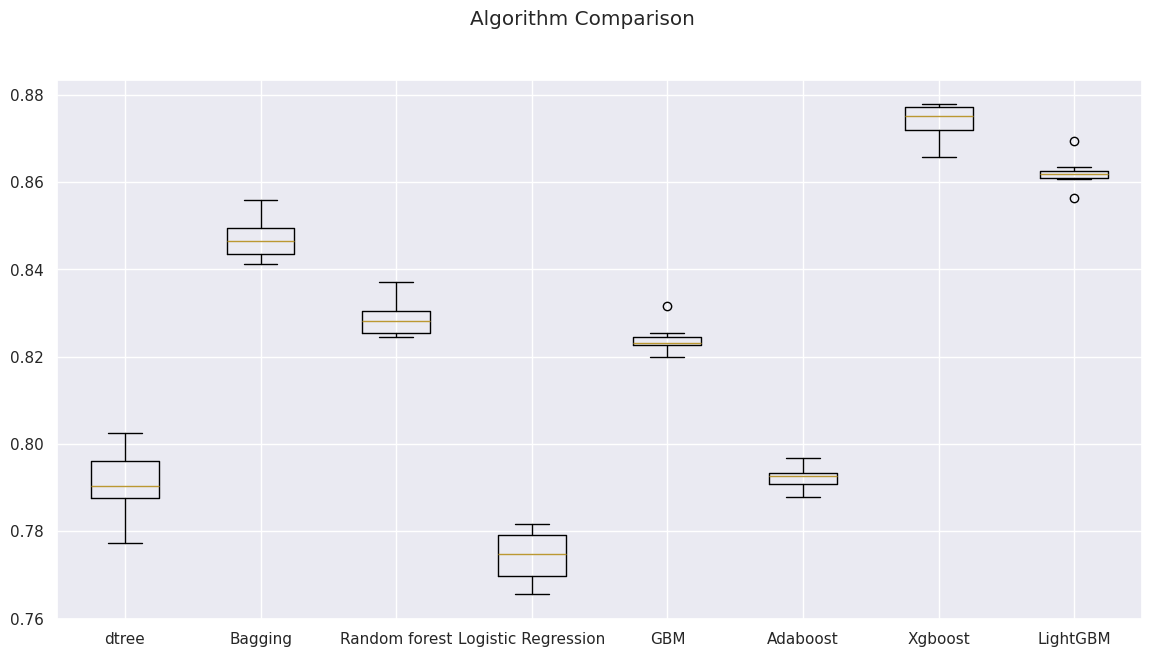

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(14, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## HyperparameterTuning

* After revieweing the performance of above models from  executions above - we would pickup the below models for hyperparameter tuning


1.   XGBoost
2.   LightGBM


### Tuning XGBoost using hyper parameters

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

param_grid = {
    'n_estimators': [250, 300],
    'scale_pos_weight': [5, 10],
    'learning_rate': [0.05, 0.1],
    'gamma': [0.1, 0.2],
    'subsample': [0.6,0.7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)


# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, param_grid=param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Best parameters are {'gamma': 0.2, 'learning_rate': 0.1, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.7} with CV score=0.8333819513962766:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

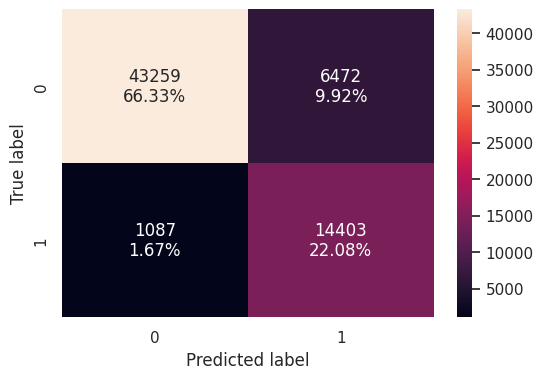

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
# Calculating metrics on train set
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.884102,0.929826,0.689964,0.792135


#### Checking model performance on validation set

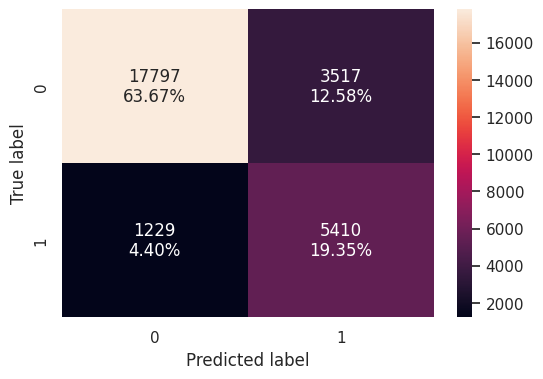

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

In [ ]:
# Calculating metrics on validation set
xgb_tuned_model_val_perf= model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
xgb_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.830215,0.814882,0.606027,0.695105


### Hyperparameter Tuning - Light GBM

In [ ]:
# Choose the type of classifier.
lgbm_tuned = LGBMClassifier(objective='binary',random_state=42,verbose=-1)

# Grid of parameters to choose from
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, 7],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 300]  # Add n_estimators to param_grid
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(lgbm_tuned,
                           param_grid,
                           cv=5,
                           scoring=scorer,  # Use the scorer
                           n_jobs=-1,
                           verbose=1)

grid_obj.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
lgbm_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lgbm_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters are {'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 63, 'subsample': 0.6} with CV score=0.8765274450986954:


LGBMClassifier(max_depth=7, n_estimators=300, num_leaves=63, objective='binary',
               random_state=42, subsample=0.6, verbose=-1)

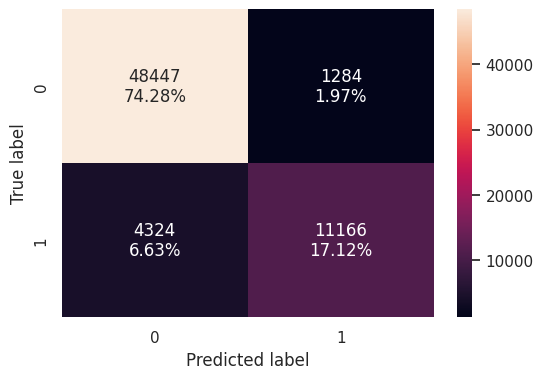

In [ ]:
confusion_matrix_sklearn(lgbm_tuned, X_train, y_train)

In [ ]:
lgbm_tuned_model_train_perf = model_performance_classification_sklearn(
    lgbm_tuned, X_train, y_train
)
lgbm_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.914015,0.720852,0.896867,0.799284


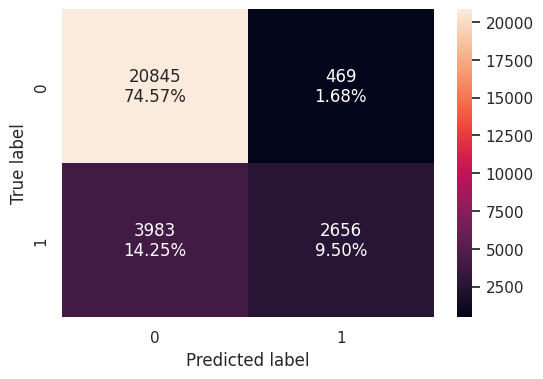

In [ ]:
confusion_matrix_sklearn(lgbm_tuned, X_val, y_val)

In [ ]:
lgbm_tuned_model_val_perf = model_performance_classification_sklearn(
    lgbm_tuned, X_val, y_val
)
lgbm_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.873359,0.599036,0.819156,0.692013


## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
      xgb_tuned_model_train_perf.T,
      lgbm_tuned_model_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost tuned",
    "LightGBM tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost tuned,LightGBM tuned
Accuracy,0.884102,0.914015
Recall,0.929826,0.720852
Precision,0.689964,0.896867
F1,0.792135,0.799284


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
      xgb_tuned_model_val_perf.T,
      lgbm_tuned_model_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost tuned",
    "LightGBM tuned",
]
print("Training performance comparison:")
models_val_comp_df


Training performance comparison:


,XGBoost tuned,LightGBM tuned
Accuracy,0.830215,0.873359
Recall,0.814882,0.599036
Precision,0.606027,0.819156
F1,0.695105,0.692013


Lets use LightGBM as the final model.
*Lets do the predictions on the test data set

In [ ]:
# Make predictions on the test set
y_pred = lgbm_tuned.predict(X_test)
# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['default'])
# Add the ID column from X_test to y_pred_df
final_df = pd.concat([X_test_ID, y_pred_df], axis=1)

In [ ]:
final_df.head()

,ID,Default
0,4855329,1
1,66862420,0
2,3637416,1
3,53682249,0
4,53937165,0


In [ ]:
#write output to csv
final_df.to_csv('/content/drive/MyDrive/Learning/PGPDSBA/Hackathon-2/submission1_thunderbolt.csv', index=False)

### Tuning XGBoost using hyper parameters

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

param_grid = {
'xgbclassifier__n_estimators':np.arange(150,500,50),
            'xgbclassifier__scale_pos_weight':[0,1,2],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
            'xgbclassifier__max_depth':np.arange(5,10,3),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]
    }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)


# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 0, 'xgbclassifier__reg_lambda': 1, 'xgbclassifier__n_estimators': np.int64(200), 'xgbclassifier__max_depth': np.int64(8), 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0} with CV score=0.8717743865178317:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

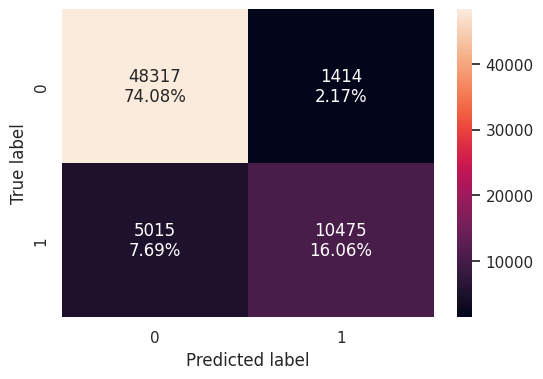

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
# Calculating metrics on train set
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.901427,0.676243,0.881067,0.765185


#### Checking model performance on validation set

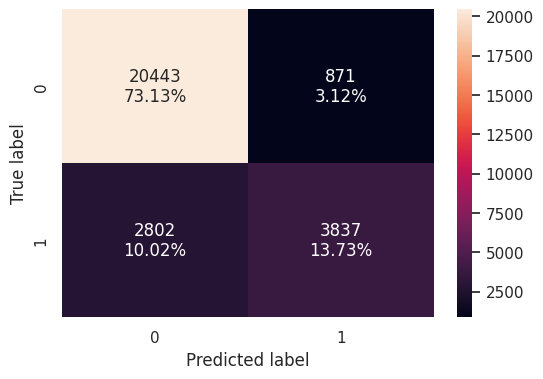

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

In [ ]:
# Calculating metrics on validation set
xgb_tuned_model_val_perf= model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
xgb_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.868601,0.577948,0.814996,0.676302


In [ ]:
# Make predictions on the test set
y_pred = xgb_tuned.predict(X_test)
# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['default'])
# Add the ID column from X_test to y_pred_df
final_df = pd.concat([X_test_ID, y_pred_df], axis=1)

In [ ]:
final_df.head()

,ID,default
0,4855329,1
1,66862420,0
2,3637416,1
3,53682249,0
4,53937165,0


In [ ]:
#write output to csv
final_df.to_csv('/content/drive/MyDrive/Learning/PGPDSBA/Hackathon-2/submission6_thunderbolt.csv', index=False)

### Hyperparameter Tuning - Light GBM

In [44]:
# Choose the type of classifier.
lgbm_tuned = LGBMClassifier(objective='binary',random_state=42,verbose=-1)

# Grid of parameters to choose from
param_grid = {

    'metric': ['binary_logloss', 'binary_error'],
    'boosting_type': ['gbdt', 'dart', 'goss'], # Explore different boosting types
    'num_leaves': np.arange(20, 512), # Wider range for tree complexity
    'max_depth': np.arange(-1, 15), # Wider range for tree depth (-1 means no limit)
    'min_child_samples': np.arange(5, 101), # Wider range for minimum samples per leaf
    'subsample': np.arange(0.4, 1.01, 0.05), # Wider range for subsample
    'colsample_bytree': np.arange(0.4, 1.01, 0.05), # Wider range for feature subsampling
    'learning_rate': np.logspace(np.log10(0.001), np.log10(0.2), num=50), # Logarithmic range for learning rate
    'n_estimators': np.arange(200, 1501, 100), # Wider range for number of estimators
    'reg_alpha': np.logspace(-3, 2, num=50), # Logarithmic range for L1 regularization
    'reg_lambda': np.logspace(-3, 2, num=50) # Logarithmic range for L2 regularization

}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = RandomizedSearchCV(lgbm_tuned,
                           param_grid,
                           cv=5,
                           n_iter=2,
                           scoring=scorer,  # Use the scorer
                           n_jobs=-1,
                           verbose=1)

grid_obj.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
lgbm_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lgbm_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters are {'subsample': np.float64(0.7), 'reg_lambda': np.float64(9.540954763499943), 'reg_alpha': np.float64(0.0020235896477251575), 'num_leaves': np.int64(385), 'n_estimators': np.int64(500), 'min_child_samples': np.int64(65), 'metric': 'binary_logloss', 'max_depth': np.int64(3), 'learning_rate': np.float64(0.012024729182136158), 'colsample_bytree': np.float64(0.8999999999999999), 'boosting_type': 'dart'} with CV score=0.7967218738617262:


LGBMClassifier(boosting_type='dart',
               colsample_bytree=np.float64(0.8999999999999999),
               learning_rate=np.float64(0.012024729182136158),
               max_depth=np.int64(3), metric='binary_logloss',
               min_child_samples=np.int64(65), n_estimators=np.int64(500),
               num_leaves=np.int64(385), objective='binary', random_state=42,
               reg_alpha=np.float64(0.0020235896477251575),
               reg_lambda=np.float64(9.540954763499943),
               subsample=np.float64(0.7), verbose=-1)

In [45]:
lgbm_tuned_model_train_perf = model_performance_classification_sklearn(
    lgbm_tuned, X_train, y_train
)
lgbm_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.797044,0.147579,0.98577,0.256724


In [46]:
lgbm_tuned_model_val_perf = model_performance_classification_sklearn(
    lgbm_tuned, X_val, y_val
)
lgbm_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.796122,0.144449,0.980573,0.251805


# **Try from chatGPT code**

In [37]:
# Compute imbalance ratio for scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

In [38]:
# Parameter grid (refined for generalization and speed)
param_grid = {
    'boosting_type': ['dart', 'gbdt'],
    'num_leaves': np.arange(20, 129, 10),
    'max_depth': np.arange(3, 12, 1),
    'min_child_samples': np.arange(10, 100, 10),
    'subsample': np.arange(0.6, 1.01, 0.1),
    'colsample_bytree': np.arange(0.6, 1.01, 0.1),
    'learning_rate': np.logspace(np.log10(0.005), np.log10(0.05), num=20),
    'n_estimators': np.arange(300, 1501, 100),
    'reg_alpha': np.logspace(0, 2, num=20),
    'reg_lambda': np.logspace(0, 2, num=20),
    'scale_pos_weight': [1, scale_pos_weight]
}

# LightGBM base model
lgb_model = LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=5,  # Increase to 200+ for better search (more time-intensive)
    scoring='accuracy',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Define fit parameters for early stopping
from lightgbm import early_stopping, log_evaluation

fit_params = {
    'eval_set': [(X_val, y_val)],
    'callbacks': [early_stopping(stopping_rounds=30), log_evaluation(100)]
}

# Fit search, passing fit_params to the fit method
random_search.fit(X_train, y_train, **fit_params)

# Best model
best_model = random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [ ]:
lgbm_tuned_model_train_perf = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
lgbm_tuned_model_train_perf

In [ ]:
lgbm_tuned_model_val_perf = model_performance_classification_sklearn(
    best_model, X_val, y_val
)
lgbm_tuned_model_val_perf